In [1]:
import numpy as np
from numpy import genfromtxt

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def softmax(x):
    x = x
    e_x = np.exp(x-np.max(x))
    return e_x / e_x.sum()

def test_loss(x_in, y_in, weights1, weights2, biases1, biases2):
        out2 = pred_out(x_in, y_in, weights1, weights2, biases1, biases2)
        loss = []
        for iter in range(out2.shape[1]):
            loss.append(MSE(out2[:, iter], y_in[:, iter]))
        return np.mean(loss)

def pred_out(x_in, y_in, weights1, weights2, biases1, biases2):
        out1_temp = np.matmul(weights1.T, x_in[:,:])+biases1
        out1 = sigmoid(out1_temp)
        out2_temp = np.matmul(weights2.T, out1)+biases2
        out2 = (out2_temp)
        return out2

def acc_out(x_in, y_in, weights1, weights2, biases1, biases2):
    pred = pred_out(x_in, y_in, weights1, weights2, biases1, biases2)
    sum_acc = 0
    for iter in range(pred.shape[1]):
#         print(iter)
        sum_acc+=(np.argmax(pred[:, iter])==np.argmax(y_in[:, iter]))
    return sum_acc/y_in.shape[1]

def MSE(yHat, y):
    return np.sum(np.multiply(yHat - y, yHat - y)) / y.size

def cross_entropy(predictions, targets, epsilon=1e-5):
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    ce = - np.mean(np.multiply(np.log(predictions),targets)) 
    return ce

In [3]:
##Load and segregate the data
letters = genfromtxt('energy_eff2.csv', delimiter=',')
# np.random.shuffle(letters)
print(letters.shape)
x_in = letters[:, 0:8]
x_mean = np.mean(x_in, axis = 0)
x_std = np.std(x_in, axis = 0)
y_in = letters[:, 8:10]
y_mean = np.mean(y_in, axis=0)
y_std = np.std(y_in, axis = 0)
# y_in = (y_in-y_mean)/y_std
x_in = (x_in-x_mean)/x_std
# print(np.std(y_in, axis=0))

(768, 10)


In [4]:
x_train = x_in[0:int(x_in.shape[0]*0.7), :]
y_train = y_in[0:int(x_in.shape[0]*0.7), :]

x_test = x_in[int(x_in.shape[0]*0.7):x_in.shape[0], :]
y_test = y_in[int(x_in.shape[0]*0.7):x_in.shape[0], :]

In [5]:
hidden_size = 10
learning_rate = 0.001
num_epochs = 1000
alpha = 0.999
alpha1 = 0.9
epsilon = 1e-8

weights1 = np.random.normal(size=(x_in.shape[1], hidden_size))
weights2 = np.random.normal(size=(hidden_size, y_in.shape[1]))
print(weights1.shape)
print(weights2.shape)
biases1 = np.random.normal(size=(hidden_size, 1))
biases2 = np.random.normal(size=(y_in.shape[1], 1))

x_train = np.matrix(x_train)
x_train = x_train.T
y_train = np.matrix(y_train)
y_train = y_train.T

x_test = np.matrix(x_test)
x_test = x_test.T
y_test = np.matrix(y_test)
y_test = y_test.T

(8, 10)
(10, 2)


In [6]:
accuracies_train = []
accuracies_test = []
losses = []
test_losses = []

biases1_squares = 0
biases2_squares = 0
weights1_squares = 0
weights2_squares = 0

biases1_momentum = 0
biases2_momentum = 0
weights1_momentum = 0
weights2_momentum = 0

for epoch_num in range(num_epochs):
    if epoch_num%5==1:
        print("test_loss : ", test_losses[-1])
        print("train_loss : ", losses[-1])
        print("epoch_num : ", epoch_num)
    for sample_num in range(x_train.shape[1]):
#         print("sample_num : ", sample_num)
        #Forward propagation
        out1_temp = np.matmul(weights1.T, x_train[:,sample_num])+biases1
        out1 = sigmoid(out1_temp)
        out2_temp = np.matmul(weights2.T, out1)+biases2
        out2 = (out2_temp)
        #Back-propogation
        error_out = out2-y_train[:, sample_num]
        err_2 = np.matrix(error_out)
        grad_2 = np.matmul(out1, err_2.T)
        err_1 = np.multiply(np.matmul(weights2, err_2), np.multiply(out1, np.ones(out1.shape)-out1))
        grad_1 = np.multiply(x_train[:, sample_num], err_1.T)
        #Updating the weights
        biases1_momentum = alpha1*biases1_momentum+(1-alpha1)*err_1
        biases2_momentum = alpha1*biases2_momentum+(1-alpha1)*err_2
        weights1_momentum = alpha1*weights1_momentum+(1-alpha1)*grad_1
        weights2_momentum = alpha1*weights2_momentum+(1-alpha1)*grad_2
        
        biases1_squares = alpha*biases1_squares+(1-alpha)*np.multiply(err_1, err_1)
        biases2_squares = alpha*biases2_squares+(1-alpha)*np.multiply(err_2, err_2)
        weights1_squares = alpha*weights1_squares+(1-alpha)*np.multiply(grad_1, grad_1)
        weights2_squares = alpha*weights2_squares+(1-alpha)*np.multiply(grad_2, grad_2)
        
        if epoch_num==0 and sample_num<50:
            temp_num = sample_num+1
            biases1_momentum_cap = biases1_momentum/(1-alpha1**temp_num)
            biases2_momentum_cap = biases2_momentum/(1-alpha1**temp_num)
            weights1_momentum_cap = weights1_momentum/(1-alpha1**temp_num)
            weights2_momentum_cap = weights2_momentum/(1-alpha1**temp_num)
            
            biases1_squares_cap = biases1_squares/(1-alpha**temp_num)
            biases2_squares_cap = biases2_squares/(1-alpha**temp_num)
            weights1_squares_cap = weights1_squares/(1-alpha**temp_num)
            weights2_squares_cap = weights2_squares/(1-alpha**temp_num)
        else:
            biases1_momentum_cap = biases1_momentum
            biases2_momentum_cap = biases2_momentum
            weights1_momentum_cap = weights1_momentum
            weights2_momentum_cap = weights2_momentum

            biases1_squares_cap = biases1_squares
            biases2_squares_cap = biases2_squares
            weights1_squares_cap = weights1_squares
            weights2_squares_cap = weights2_squares

        biases1 = biases1 - np.multiply(learning_rate/(np.sqrt(biases1_squares_cap)+epsilon), biases1_momentum_cap)
        biases2 = biases2 - np.multiply(learning_rate/(np.sqrt(biases2_squares_cap)+epsilon), biases2_momentum_cap)
        weights1 = weights1 - np.multiply(learning_rate/(np.sqrt(weights1_squares_cap)+epsilon), weights1_momentum_cap)
        weights2 = weights2 - np.multiply(learning_rate/(np.sqrt(weights2_squares_cap)+epsilon), weights2_momentum_cap)
        #Updating the accuracy and loss
        #End of for loop
#     print("accuracy : ", np.mean(acc_arr))
    test_losses.append(test_loss(x_test, y_test, weights1, weights2, biases1, biases2))
#     accuracies_test.append(acc_out(x_test, y_test, weights1, weights2, biases1, biases2))
#     accuracies_train.append(acc_out(x_train, y_train, weights1, weights2, biases1, biases2))
    losses.append(test_loss(x_train, y_train, weights1, weights2, biases1, biases2))
    

test_loss :  318.4257090952691
train_loss :  311.2534752172193
epoch_num :  1
test_loss :  25.145800548450943
train_loss :  23.519098912258
epoch_num :  6
test_loss :  15.284308414729216
train_loss :  12.322216432605128
epoch_num :  11
test_loss :  10.935657521730336
train_loss :  9.661060842492578
epoch_num :  16
test_loss :  9.701450268317604
train_loss :  8.778062470636902
epoch_num :  21
test_loss :  9.11454124833586
train_loss :  8.334651970709219
epoch_num :  26
test_loss :  8.557712984602887
train_loss :  7.913290863403184
epoch_num :  31
test_loss :  8.008250387919828
train_loss :  7.463408142915387
epoch_num :  36
test_loss :  7.517728588378196
train_loss :  7.027973753509007
epoch_num :  41
test_loss :  7.103318769394258
train_loss :  6.63886660459129
epoch_num :  46
test_loss :  6.756706883682766
train_loss :  6.301985804984806
epoch_num :  51
test_loss :  6.366886942620526
train_loss :  5.929367743739293
epoch_num :  56
test_loss :  5.927841814534466
train_loss :  5.5051520

test_loss :  1.7061086462569552
train_loss :  1.316006055497826
epoch_num :  511
test_loss :  1.7040931917416908
train_loss :  1.312204676416633
epoch_num :  516
test_loss :  1.702149639846557
train_loss :  1.3085955598015209
epoch_num :  521
test_loss :  1.7002712031191891
train_loss :  1.3051651784330394
epoch_num :  526
test_loss :  1.6984514793998842
train_loss :  1.3019006177700312
epoch_num :  531
test_loss :  1.696684477227687
train_loss :  1.2987896516262019
epoch_num :  536
test_loss :  1.6949646292293985
train_loss :  1.295820787560926
epoch_num :  541
test_loss :  1.6932867918852534
train_loss :  1.2929832863653636
epoch_num :  546
test_loss :  1.6916462334607703
train_loss :  1.2902671608727856
epoch_num :  551
test_loss :  1.6900386131791683
train_loss :  1.28766315916005
epoch_num :  556
test_loss :  1.6884599548708041
train_loss :  1.2851627365945464
epoch_num :  561
test_loss :  1.686906617954961
train_loss :  1.2827580204207225
epoch_num :  566
test_loss :  1.685375268

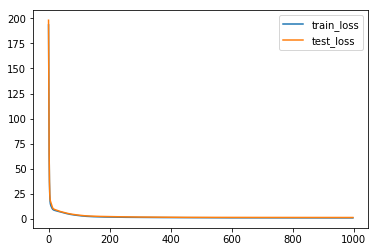

In [10]:
import matplotlib.pyplot as plt
# plt.subplot(211)
plt.plot(losses[1:], label = 'train_loss')
plt.plot(test_losses[1:], label = 'test_loss')
plt.legend()
plt.show()
# plt.subplot(212)
# plt.plot(np.multiply(pred_out(x_test, y_test, weights1, weights2, biases1, biases2)-y_test, pred_out(x_test, y_test, weights1, weights2, biases1, biases2)-y_test).T)

In [8]:
ind = 101
print(pred_out(x_test, y_test, weights1, weights2, biases1, biases2)[:,10:15])
print(y_test[:,10:15])

[[41.74418942 31.83807371 16.80085286 29.20293452 14.17925139]
 [43.01112017 31.61893602 19.96978337 31.99266066 16.64158999]]
[[43.1  31.81 16.86 29.87 14.28]
 [39.41 31.2  20.01 29.87 15.87]]


In [9]:
print(losses[-1])

1.1696823649768222
